In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data.dropna(inplace = True)

In [5]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [6]:
split_1 = int(len(data) * .6)
split_2 = int(len(data) * .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [7]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [8]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out)
X_hold = sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [9]:
model1 = sm.OLS(y_in, X_in).fit()

In [10]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FedFunds   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     14.83
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           3.09e-09
Time:                        17:31:46   Log-Likelihood:                -1202.0
No. Observations:                 467   AIC:                             2412.
Df Residuals:                     463   BIC:                             2429.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4750      0.985      3.529      0.000       1.540       5.410
Unemployment      0.5307      0.106      5.009      0.000       0.323       0.739
HousingStarts    -0.0005      0.000     -1.046      0.296      -0.001       0.000
Inflation         0.0077      0.004      2.173      0.030       0.001       0.015
==============================================================================
Omnibus:                       77.750   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.849
Skew:                           1.039   Prob(JB):                     2.11e-27
Kurtosis:                       4.413   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 4.) Recreate the graph for your model

In [11]:
import matplotlib.pyplot as plt

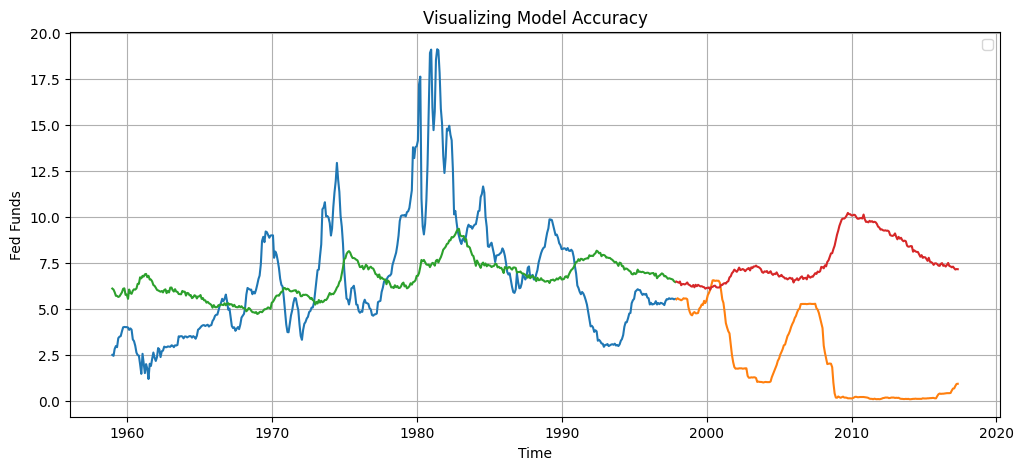

In [12]:
plt.figure(figsize = (12,5))

### plot of 'in-sample'
plt.plot(y_in)

### plot of 'out-of-sample'
plt.plot(y_out)

### plot of 'in-sample predictions'
plt.plot(model1.predict(X_in))

### plot of 'out-of-sample predictions'
plt.plot(model1.predict(X_out))

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
in_mse_1 = mean_squared_error(model1.predict(X_in), y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out), y_out)

In [15]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.360827835668566


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
max_degrees = 3

DEGREE:  1


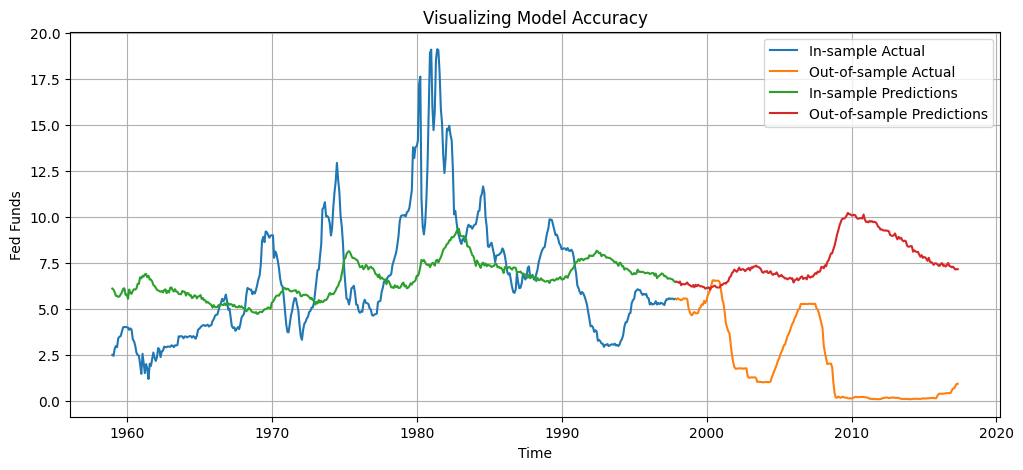

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783565212
-----
DEGREE:  2


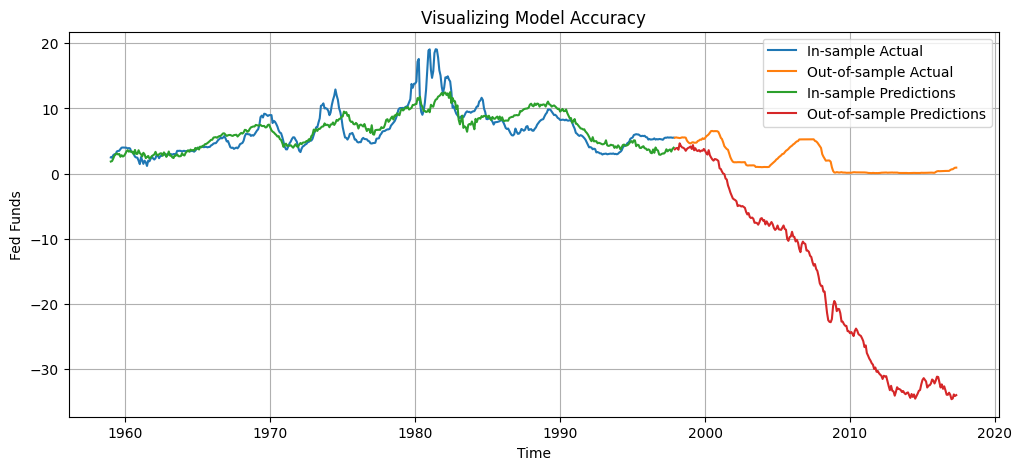

Insample MSE :  3.863477139276067
Outsample MSE :  481.4465099024015
-----
DEGREE:  3


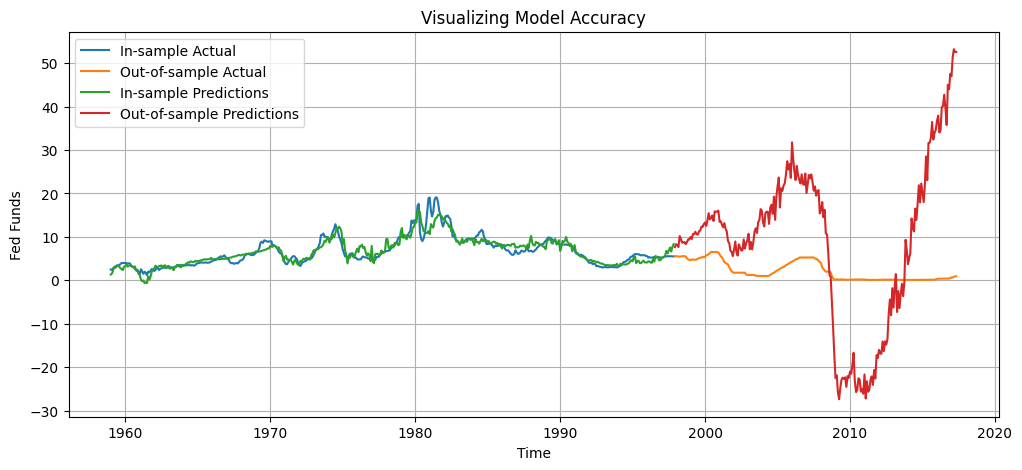

Insample MSE :  1.872363628831326
Outsample MSE :  371.7672613994206
-----


In [18]:
for degrees in range(1, max_degrees + 1):
    print("DEGREE: ", degrees)

    poly = PolynomialFeatures(degree = degrees)
    # fit the data to X_in and also output the transform
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    
    # Step 3:
    model1 = sm.OLS(y_in, X_in_poly).fit()
    
    # Step 4:
    plt.figure(figsize = (12,5))
    
    ### plot of 'in-sample'
    plt.plot(y_in, label='In-sample Actual')

    ### plot of 'out-of-sample'
    plt.plot(y_out, label='Out-of-sample Actual')

    ### plot of 'in-sample predictions'
    plt.plot(y_in.index, model1.predict(X_in_poly), label='In-sample Predictions')
    
    ### plot of 'out-of-sample predictions'
    plt.plot(y_out.index, model1.predict(X_out_poly), label='Out-of-sample Predictions')

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Step 5:
    in_mse_1 = mean_squared_error(model1.predict(X_in_poly), y_in)
    out_mse_1 = mean_squared_error(model1.predict(X_out_poly), y_out)
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)
    print("-----")
    

# 7.) State your observations :

* Model 1: Degree = 1  
Observing the first model, where the degree is set to 1, it's evident that it does not accurately predict the in-sample data, a conclusion supported by its high 'In-sample MSE', the highest among the three models. However, this model exhibits the lowest 'Out-sample MSE', suggesting a better performance in predicting out-of-sample data compared to the other two models.  

* Model 2: Degree = 2  
Model 2, with a polynomial degree of 2, demonstrates a marked improvement in predicting in-sample data, as evidenced by a significant reduction in its MSE from 10.07 to 3.86. This indicates substantial enhancement in fitting the in-sample data. However, there's a noticeable increase in the 'Out-sample MSE', indicating that the model may be overfitting the in-sample data, leading to poorer generalization on the out-sample data.   

* Model 3: Degree = 3  
For the model with a degree of 3, the 'In-sample MSE' further decreases to approximately 1.87, the lowest among all three models. This suggests that it is the most accurate in predicting in-sample data. Additionally, there's a slight decrease in 'Out-sample MSE' from 481.45 to 371.77 compared to Model 2, but this figure is still considerably higher than that of Model 1. This implies that while Model 3 is highly effective for in-sample predictions, its ability to generalize to out-sample data is limited compared to Model 1. 